##                                   AIM 5001 Final Project
####                                                                             By Zeyu Wang

# 1. Abstract：Last few years, many countries have a quick development and the GDP is the main indicator used to describe a country's development. In this project, we will research several other indicators that also have a relationship with GDP and these indicators are important for the country's development and will be beneficial for the political researcher in their research.

# 2. Introduction: In this project, I would like to analyze several indicators such as CO2 emissions, Commercial service exports,  Commercial service imports, Communications computer exports, Communications computer imports and  Current health expenditure per capita and observed do they have a relationship with GDP? 
- Firstly, I need to get the data. I will get GDP data from INF and these several indicators from The World Bank Data.INF(https://www.imf.org/en/Publications/WEO/weo-database/2021/April/weo-report?c=512,914,612,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=NGDPD,&sy=2006&ey=2020&ssm=0&scsm=0&scc=0&ssd=0&ssc=0&sic=0&sort=country&ds=.&br=1) and The World Bank Data(https://datahelpdesk.worldbank.org/knowledgebase/topics/125589-developer-information)
- Secondly, after I get the data from the INF which it's the dynamic web pages, I store them into the MongoDB database and will take them out when I need them.
- Thirdly, I will use WebApi to get data from the World Bank Data and use them to form three Pandas datasets which will including the GDP.
- Finally, I will draw several graphs to compare their relationship and know are they positive correlation or negative correlation. The result will be beneficial for some relative scientists.

# 3. Research Approach: I will use some relative technology to deal with my data. For example, I need to use statistical knowledge suck as variance to help me decide which country can help me to get the answer rather than use all of the data. And I will use data reshaping operation to help me better understand the data. Also, for getting a better result, I need to use feature engineering methods such as feature scaling. Furthermore, grouping also will be used in this project. Finally, comparing the trends in the line chart to make sure their relationship is the method I will take to find their relationship because I think this method is most direct to get the answer.

# 4.Exploratory Data Analysis & Data Preparation

In [1]:
import bs4 as bs
import urllib.request
import requests
import sys
from PyQt5.QtCore import QEventLoop,QUrl
from PyQt5.QtWidgets import QApplication
from PyQt5.QtWebEngineWidgets import QWebEngineView
import lxml.html
import re
import pandas as pd
import numpy as np
import psycopg2
import pymongo
from pymongo import MongoClient
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

## 4.1 Get GDP's data

### 4.1.1 Because the INF website is a dynamic webpage and it's hard to get by a general method. So we need to use pyqt5 to imitate the browser to get the data from the INF and then parsing the data. The following code is used to imitate the browser and get the dynamic web pages' data.

In [2]:
def render(url):
    """Fully render HTML, JavaScript and all."""


    class Render(QWebEngineView):
        def __init__(self, url):
            self.html = None
            self.app = QApplication(sys.argv)
            QWebEngineView.__init__(self)
            self.loadFinished.connect(self._loadFinished)
            self.load(QUrl(url))
            while self.html is None:
                self.app.processEvents(QEventLoop.ExcludeUserInputEvents | QEventLoop.ExcludeSocketNotifiers | QEventLoop.WaitForMoreEvents)
            self.app.quit()

        def _callable(self, data):
            self.html = data

        def _loadFinished(self, result):
            self.page().toHtml(self._callable)

    return Render(url).html


### 4.1.2Get the data about the ECONOMIES' GDP. First, we need to choose all of the countries on the INF website. After that, we can get a URL which is a dynamic webpage including the GDP data.

In [3]:
develop_country_GDP = render('https://www.imf.org/en/Publications/WEO/weo-database/2021/April/weo-report?c=512,914,612,614,311,213,911,314,193,122,912,313,419,513,316,913,124,339,638,514,218,963,616,223,516,918,748,618,624,522,622,156,626,628,228,924,233,632,636,634,238,662,960,423,935,128,611,321,243,248,469,253,642,643,939,734,644,819,172,132,646,648,915,134,652,174,328,258,656,654,336,263,268,532,944,176,534,536,429,433,178,436,136,343,158,439,916,664,826,542,967,443,917,544,941,446,666,668,672,946,137,546,674,676,548,556,678,181,867,682,684,273,868,921,948,943,686,688,518,728,836,558,138,196,278,692,694,962,142,449,564,565,283,853,288,293,566,964,182,359,453,968,922,714,862,135,716,456,722,942,718,724,576,936,961,813,726,199,733,184,524,361,362,364,732,366,144,146,463,528,923,738,578,537,742,866,369,744,186,925,869,746,926,466,112,111,298,927,846,299,582,487,474,754,698,&s=NGDPD,&sy=2006&ey=2020&ssm=0&scsm=0&scc=0&ssd=0&ssc=0&sic=0&sort=country&ds=.&br=1')

### 4.1.3 After getting the data from INF, we use bs4 to extract the LXML data.

In [4]:
soup_neg = bs.BeautifulSoup(develop_country_GDP,'lxml')

In [5]:
name_neg_str = ''
for name_neg in soup_neg.find_all('tbody'):
    name_neg_str = name_neg.text
    name_neg_str = name_neg_str.replace('\n',' ')
    #print(name_neg_str)
pattern = re.compile(r'[A-Za-z\s.]+[0-9.,\s]+')#this re is used to extract the country name and GDP data from the string.
name_neg_list = re.findall(pattern, name_neg_str)
name_neg_list
country_name = []
country_GDP = []
for i in name_neg_list:
    a_data = i.split(' U.S. dollars Billions   ')
    if len(a_data)==1:# some country's name has non_english letter and we will ignore them
        continue
    a_data[1] = a_data[1][:-8]
    a_data[1] = a_data[1].replace(',','')
    a_data[1].split(' ')
    if len(a_data[1].split(' '))!=15:#some country doesn't have 15 years GDP data and we will ignore them
        continue
    a_data[0] = a_data[0].replace('.',' ')
    country_name.append(a_data[0])
    country_GDP.append(a_data[1].split(' '))
#We have 192 country's data
year = [i for i in range(2006, 2021)]
df_gdp = pd.DataFrame(index = country_name, data = country_GDP, columns = year, dtype=np.float)
df_gdp

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Afghanistan,6.925,8.556,10.297,12.066,15.325,17.890,20.293,20.170,20.635,20.220,17.994,18.910,18.401,18.876,19.132
Albania,8.896,10.677,12.881,12.044,11.937,12.899,12.324,12.784,13.246,11.389,11.862,13.053,15.147,15.276,15.147
Algeria,117.027,134.977,171.001,137.054,161.207,200.251,209.059,209.755,213.810,165.979,160.034,170.207,175.367,171.070,144.294
Angola,52.381,65.266,88.539,70.307,83.799,111.790,128.053,136.710,145.712,116.194,101.124,122.124,105.902,89.603,62.440
Antigua and Barbuda,1.157,1.311,1.368,1.224,1.149,1.138,1.200,1.181,1.250,1.337,1.437,1.468,1.605,1.662,1.390
Argentina,232.892,287.921,363.545,334.633,424.729,527.644,579.666,611.471,563.614,642.464,556.774,643.861,517.244,444.458,388.279
Armenia,6.384,9.206,11.662,8.648,9.260,10.142,10.619,11.121,11.610,10.553,10.546,11.527,12.458,13.673,12.339
Aruba,2.470,2.678,2.843,2.554,2.454,2.638,2.615,2.728,2.791,2.963,2.984,3.092,3.202,3.342,2.458
Australia,781.291,947.890,1055.507,998.928,1251.853,1513.684,1569.319,1518.427,1457.388,1234.823,1266.268,1385.194,1421.303,1391.536,1359.326
Austria,336.298,389.231,432.005,401.323,392.595,431.609,409.661,430.197,442.699,382.010,395.728,417.091,455.301,445.125,428.622


#### We get this data set which is 192 countries and 15 years of GDP data. The index of this Pandas dataset is the country's name. The unit of GDP is Billion.

## 4.2 Store the data into NoSQL MongoDB because there is only one table and doesn't need to create the relationship.

In [6]:
client = MongoClient()
db = client['finalproject']#create a new database 'finalproject'
db = client.finalproject

In [7]:
def MongodbInsertDAta(colloection, post):
    '''
    This function will get a collection name and use it to create a new collection in MongoDB.
    This function will insert the post into MongoDB so that post must be in a format that suits the MongoDB grammar.
    '''
    posts_collection = db[colloection]
    post_id = posts_collection.insert_many(post)

In [8]:
data_country = []
for i in range(len(country_name)):
    name = country_name[i]
    gdp = country_GDP[i]
    data_dict = {}# form the MongoDB grammar
    data_dict[name] = gdp
    data_country.append(data_dict)
#print(data_country)
MongodbInsertDAta("data_country", data_country)
client.close()

### We successfully store the data into MongoDB.

## 4.3 get country GDP data from MongoDB

In [9]:
db = client.finalproject#choose Database finalproject and store into db
collection_data_country = db['data_country']#choose collection 'data_country'
cursor = collection_data_country.find()#select all the data from mogoDB's collection 'data_country'
entries = list(cursor)#change the data into list

In [10]:
entries

[{'_id': ObjectId('609149742e50242c73f46ffd'),
  '  Afghanistan': ['6.925',
   '8.556',
   '10.297',
   '12.066',
   '15.325',
   '17.890',
   '20.293',
   '20.170',
   '20.635',
   '20.220',
   '17.994',
   '18.910',
   '18.401',
   '18.876',
   '19.132']},
 {'_id': ObjectId('609149742e50242c73f46ffe'),
  'Albania': ['8.896',
   '10.677',
   '12.881',
   '12.044',
   '11.937',
   '12.899',
   '12.324',
   '12.784',
   '13.246',
   '11.389',
   '11.862',
   '13.053',
   '15.147',
   '15.276',
   '15.147']},
 {'_id': ObjectId('609149742e50242c73f46fff'),
  'Algeria': ['117.027',
   '134.977',
   '171.001',
   '137.054',
   '161.207',
   '200.251',
   '209.059',
   '209.755',
   '213.810',
   '165.979',
   '160.034',
   '170.207',
   '175.367',
   '171.070',
   '144.294']},
 {'_id': ObjectId('609149742e50242c73f47000'),
  'Angola': ['52.381',
   '65.266',
   '88.539',
   '70.307',
   '83.799',
   '111.790',
   '128.053',
   '136.710',
   '145.712',
   '116.194',
   '101.124',
   '122.124

In [11]:
#extract data from the form of Mongodb's dict
coun_name = []
coun_GDP = []
for i in entries:
    item = i.items()
    name, gdp = list(item)[1]
    coun_name.append(name)
    coun_GDP.append(gdp)

In [12]:
#create Pandas
df1_gdp = pd.DataFrame(index = coun_name, data = coun_GDP, columns = year, dtype=np.float)
df1_gdp

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Afghanistan,6.925,8.556,10.297,12.066,15.325,17.890,20.293,20.170,20.635,20.220,17.994,18.910,18.401,18.876,19.132
Albania,8.896,10.677,12.881,12.044,11.937,12.899,12.324,12.784,13.246,11.389,11.862,13.053,15.147,15.276,15.147
Algeria,117.027,134.977,171.001,137.054,161.207,200.251,209.059,209.755,213.810,165.979,160.034,170.207,175.367,171.070,144.294
Angola,52.381,65.266,88.539,70.307,83.799,111.790,128.053,136.710,145.712,116.194,101.124,122.124,105.902,89.603,62.440
Antigua and Barbuda,1.157,1.311,1.368,1.224,1.149,1.138,1.200,1.181,1.250,1.337,1.437,1.468,1.605,1.662,1.390
Argentina,232.892,287.921,363.545,334.633,424.729,527.644,579.666,611.471,563.614,642.464,556.774,643.861,517.244,444.458,388.279
Armenia,6.384,9.206,11.662,8.648,9.260,10.142,10.619,11.121,11.610,10.553,10.546,11.527,12.458,13.673,12.339
Aruba,2.470,2.678,2.843,2.554,2.454,2.638,2.615,2.728,2.791,2.963,2.984,3.092,3.202,3.342,2.458
Australia,781.291,947.890,1055.507,998.928,1251.853,1513.684,1569.319,1518.427,1457.388,1234.823,1266.268,1385.194,1421.303,1391.536,1359.326
Austria,336.298,389.231,432.005,401.323,392.595,431.609,409.661,430.197,442.699,382.010,395.728,417.091,455.301,445.125,428.622


## 4.4 Analysis of the GDP trends of the countrys

### 4.4.1 Draw the country's GDP trends from 2006 to 2020.

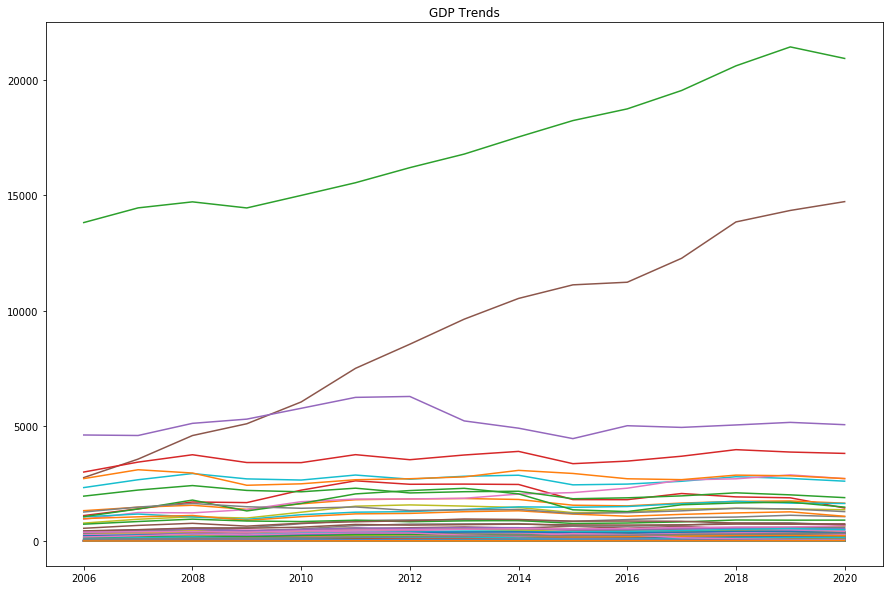

In [13]:
plt.figure(figsize=(15,10))
for i in range(len(df1_gdp)):
    plt.plot(year, df1_gdp.iloc[i,:], label=coun_name[i])
plt.title('GDP Trends')
#plt.legend()
plt.show()

#### From this graph, we can see that most of the countries GDP don't have obvious change and there are two country's GDP have a large change from 2006 to 2020. So I decide to choose two countries that have the largest variance and the country with the least variance. And then plus the sum of all the country's GDP which can help us to understand that the total GDP trends on the earth are growing. Finally, find some indicators which are a relationship with these five data.

## 4.5 Get some indicators data from The World Bank Data

### 4.5.1 We need to make sure which country we will use to analyze the GDP data.

In [14]:
df1_gdp['var'] = np.var(df1_gdp, axis = 1)# We add a varriance attribute for the data

In [15]:
df2_gdp = df1_gdp.sort_values(by='var', ascending=False)

In [16]:
df2_gdp

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,var
China,2754.113,3555.679,4577.397,5088.993,6033.813,7492.257,8539.472,9625.044,10524.211,11113.528,11227.075,12265.317,13841.901,14340.600,14722.837,1.481852e+07
United States,13814.600,14451.875,14712.825,14448.925,14992.050,15542.600,16197.050,16784.825,17527.275,18238.300,18745.100,19542.975,20611.875,21433.225,20932.750,6.274959e+06
India,949.118,1238.700,1224.096,1365.373,1708.460,1823.052,1827.637,1856.721,2039.127,2103.588,2294.118,2651.474,2701.112,2870.504,2708.770,3.401986e+05
Japan,4601.663,4579.749,5106.679,5289.494,5759.072,6233.147,6272.364,5212.328,4896.995,4444.931,5003.678,4930.837,5036.892,5148.781,5048.688,2.734643e+05
Brazil,1107.628,1397.114,1695.855,1669.204,2208.704,2614.027,2464.054,2471.718,2456.055,1800.046,1796.622,2063.518,1916.934,1877.114,1434.084,1.856965e+05
Russia,1060.901,1393.416,1779.109,1307.927,1633.111,2046.621,2191.484,2288.428,2048.836,1356.704,1280.648,1575.140,1653.006,1689.302,1473.583,1.216457e+05
Germany,2994.862,3425.982,3744.854,3407.557,3402.444,3748.655,3529.377,3733.859,3890.095,3357.926,3468.896,3681.303,3965.565,3861.550,3803.014,6.322140e+04
Korea,1052.610,1172.465,1049.168,943.739,1143.568,1253.419,1278.046,1370.633,1484.489,1466.039,1499.362,1623.074,1725.373,1646.739,1630.871,5.791971e+04
Australia,781.291,947.890,1055.507,998.928,1251.853,1513.684,1569.319,1518.427,1457.388,1234.823,1266.268,1385.194,1421.303,1391.536,1359.326,5.117813e+04
Indonesia,396.293,470.144,558.582,577.539,755.256,892.590,919.002,916.646,891.051,860.741,932.066,1015.488,1042.711,1120.042,1059.638,4.742774e+04


#### We can see that China and the United States have the largest variance and Tuvalu has the smallest variance. These three countries are the best choice for our analysis because the China and USA are easier to observed and Tuvalu can verification the corresponding relationship because its change is very small.

In [17]:
df3_gdp = df2_gdp.iloc[[0,1,-1]]

In [18]:
df4_gdp = df2_gdp.sum()
df4_gdp

2006    5.161763e+04
2007    5.825514e+04
2008    6.387893e+04
2009    6.052143e+04
2010    6.618094e+04
2011    7.350334e+04
2012    7.489598e+04
2013    7.706530e+04
2014    7.913596e+04
2015    7.491772e+04
2016    7.615119e+04
2017    8.082569e+04
2018    8.588402e+04
2019    8.733621e+04
2020    8.452868e+04
var     2.256681e+07
dtype: float64

In [19]:
df3_gdp

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,var
China,2754.113,3555.679,4577.397,5088.993,6033.813,7492.257,8539.472,9625.044,10524.211,11113.528,11227.075,12265.317,13841.901,14340.600,14722.837,1.481852e+07
United States,13814.600,14451.875,14712.825,14448.925,14992.050,15542.600,16197.050,16784.825,17527.275,18238.300,18745.100,19542.975,20611.875,21433.225,20932.750,6.274959e+06
Tuvalu,0.023,0.027,0.031,0.027,0.031,0.038,0.037,0.037,0.037,0.035,0.040,0.043,0.046,0.047,0.048,5.438222e-05


In [20]:
df3_gdp.loc[3] = df4_gdp
df3_gdp.index = ['China', 'United States', 'Tuvalu', 'Total']
del df3_gdp['var']
df3_gdp

e:\ProgramData\Anaconda3\envs\tensorflow_cpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
China,2754.113,3555.679,4577.397,5088.993,6033.813,7492.257,8539.472,9625.044,10524.211,11113.528,11227.075,12265.317,13841.901,14340.600,14722.837
United States,13814.600,14451.875,14712.825,14448.925,14992.050,15542.600,16197.050,16784.825,17527.275,18238.300,18745.100,19542.975,20611.875,21433.225,20932.750
Tuvalu,0.023,0.027,0.031,0.027,0.031,0.038,0.037,0.037,0.037,0.035,0.040,0.043,0.046,0.047,0.048
Total,51617.631,58255.141,63878.933,60521.429,66180.940,73503.345,74895.977,77065.298,79135.962,74917.721,76151.185,80825.686,85884.016,87336.213,84528.682


#### Observed these four data's growth trends. We can see that whatever China and United States which has the largest growth on the earth or the Tuvalu which has the smallest growth on the earth, their GDP growth trends are increasing.

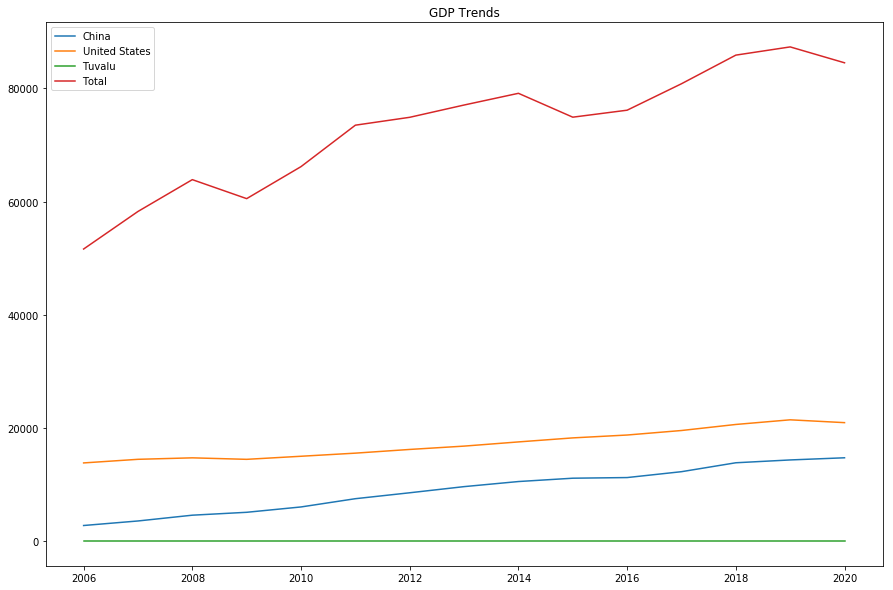

In [21]:
plt.figure(figsize=(15,10))
for i in range(len(df3_gdp)):
    plt.plot(year, df3_gdp.iloc[i,:], label=df3_gdp.index[i])
plt.legend()
plt.title('GDP Trends')
plt.show()

#### We can clearly see that China and United States' growth rate is less than the total GDP. But all of them is growth.

### 4.5.2 Change data from wide to long

In [30]:
# Before we chnage it to long data, we need to add a new index name for country
df3_gdp.index.name = 'country'# add the index name
def8 = df3_gdp.reset_index()
def8

,country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,China,2754.113,3555.679,4577.397,5088.993,6033.813,7492.257,8539.472,9625.044,10524.211,11113.528,11227.075,12265.317,13841.901,14340.600,14722.837
1,United States,13814.600,14451.875,14712.825,14448.925,14992.050,15542.600,16197.050,16784.825,17527.275,18238.300,18745.100,19542.975,20611.875,21433.225,20932.750
2,Tuvalu,0.023,0.027,0.031,0.027,0.031,0.038,0.037,0.037,0.037,0.035,0.040,0.043,0.046,0.047,0.048
3,Total,51617.631,58255.141,63878.933,60521.429,66180.940,73503.345,74895.977,77065.298,79135.962,74917.721,76151.185,80825.686,85884.016,87336.213,84528.682


In [31]:
grouped = pd.melt(def8,["country"],var_name="year",value_name="GDP")
grouped = grouped.sort_values(by=["country", "year"])
grouped1 = grouped.groupby([grouped['country'],grouped['year']])
grouped1.sum()

GDP
country       year           
China         2006   2754.113
              2007   3555.679
              2008   4577.397
              2009   5088.993
              2010   6033.813
              2011   7492.257
              2012   8539.472
              2013   9625.044
              2014  10524.211
              2015  11113.528
              2016  11227.075
              2017  12265.317
              2018  13841.901
              2019  14340.600
              2020  14722.837
Total         2006  51617.631
              2007  58255.141
              2008  63878.933
              2009  60521.429
              2010  66180.940
              2011  73503.345
              2012  74895.977
              2013  77065.298
              2014  79135.962
              2015  74917.721
              2016  76151.185
              2017  80825.686
              2018  85884.016
              2019  87336.213
              2020  84528.682
Tuvalu        2006      0.023
              2007      0.027
              2008      0.031
              2009      0.027
              2010      0.031
              2011      0.038
              2012      0.037
              2013      0.037
              2014      0.037
              2015      0.035
              2016      0.040
              2017      0.043
              2018      0.046
              2019      0.047
              2020      0.048
United States 2006  13814.600
              2007  14451.875
              2008  14712.825
              2009  14448.925
              2010  14992.050
              2011  15542.600
              2012  16197.050
              2013  16784.825
              2014  17527.275
              2015  18238.300
              2016  18745.100
              2017  19542.975
              2018  20611.875
              2019  21433.225
              2020  20932.750

#### Because we let the columns only have a variable and it's easier to observed the GDP data of different countries in different years. Their presidential Trends are increasing and it's important for our later analysis. Because we know the trends of GDP, we can use feature scaling to compare with other indicators although sometimes GDP is small due to its large unit. But we only need to observe its trends rather than its large or small number.

In [32]:
grouped2 = grouped.groupby([grouped['country']])
grouped2.sum()

,GDP
country,
China,135702.237
Total,1094698.159
Tuvalu,0.547
United States,257976.250


#### How small number Tuvalu is. But if it also has the same relationship as other countries with other indicators, it can stronger to distinguish the relationship between these indicators.

## 4.6 We will get the Chinese, United States, Nauru, Tuvalu's data from The World Bank Data

In [33]:
def datadeal(data):
    '''
    This method will use to clean the data from the the World Bank Data's webapi.
    ----------------------------------------------------
    This method will return the data which is only include the useful data
    '''
    data_value = []
    for i in data[1]:
        data_value.append(i['value'])
    return data_value[::-1]
    

In [34]:
#CHN   USA   TUV:Tuvalu
'''
This is the code of WebApi and it will be referenced follow.

1.CO2 emissions (kt) EN.ATM.CO2E.KT
2.Commercial service exports (current US$) TX.VAL.SERV.CD.WT
3.Commercial service imports (current US$) TM.VAL.SERV.CD.WT
4.Communications, computer, etc. (% of service exports, BoP) BX.GSR.CMCP.ZS
5.Communications, computer, etc. (% of service imports, BoP) BM.GSR.CMCP.ZS
6.Current health expenditure per capita (current US$) SH.XPD.CHEX.PC.CD

'''


'\nThis is the code of WebApi and it will be referenced follow.\n\n1.CO2 emissions (kt) EN.ATM.CO2E.KT\n2.Commercial service exports (current US$) TX.VAL.SERV.CD.WT\n3.Commercial service imports (current US$) TM.VAL.SERV.CD.WT\n4.Communications, computer, etc. (% of service exports, BoP) BX.GSR.CMCP.ZS\n5.Communications, computer, etc. (% of service imports, BoP) BM.GSR.CMCP.ZS\n6.Current health expenditure per capita (current US$) SH.XPD.CHEX.PC.CD\n\n'

#### The WebApi required such code to add to the URL. The string means the meaning of the data and the code such as TX.VAL.SERV.CD.WT is used to tell the website which data you want. By the way, CHN, USA and TUV are used to identify the country and they also need to add to the URL.

### 4.6.1 China indicator, we use URL to get data from the WebApi and extract the data from it.

In [35]:
# China CO2 emissions (kt)
China1 = requests.get('http://api.worldbank.org/v2/country/CHN/indicator/EN.ATM.CO2E.KT?date=2006:2020&format=json')
res1 = China1.json()
China_CO1 = datadeal(res1)
# China Commercial service exports (current US$)
China2 = requests.get('http://api.worldbank.org/v2/country/CHN/indicator/TX.VAL.SERV.CD.WT?date=2006:2020&format=json')
res2 = China2.json()
China_CO2 = datadeal(res2)
# China Commercial service imports (current US$)
China3 = requests.get('http://api.worldbank.org/v2/country/CHN/indicator/TM.VAL.SERV.CD.WT?date=2006:2020&format=json')
res3 = China3.json()
China_CO3 = datadeal(res3)
# China Communications, computer, etc. (% of service exports, BoP)
China4 = requests.get('http://api.worldbank.org/v2/country/CHN/indicator/BX.GSR.CMCP.ZS?date=2006:2020&format=json')
res4 = China4.json()
China_CO4 = datadeal(res4)
# China Communications, computer, etc. (% of service imports, BoP) 
China5 = requests.get('http://api.worldbank.org/v2/country/CHN/indicator/BM.GSR.CMCP.ZS?date=2006:2020&format=json')
res5 = China5.json()
China_CO5 = datadeal(res5)
# China Current health expenditure per capita (current US$)
China6 = requests.get('http://api.worldbank.org/v2/country/CHN/indicator/SH.XPD.CHEX.PC.CD?date=2006:2020&format=json')
res6 = China6.json()
China_CO6 = datadeal(res6)

In [36]:
China_CO6# what the extracting data is.

[81.22816467,
 97.07929993,
 131.88728333,
 162.61755371,
 186.49150085,
 236.37492371,
 281.67715454,
 326.04159546,
 359.30932617,
 390.10409546,
 395.35995483,
 437.25674438,
 501.05938721,
 None,
 None]

### 4.6.2 USA indicator

In [37]:
# USA CO2 emissions (kt)
USA1 = requests.get('http://api.worldbank.org/v2/country/USA/indicator/EN.ATM.CO2E.KT?date=2006:2020&format=json').json()
USA_CO1 = datadeal(USA1)
# USA Commercial service exports (current US$)
USA2 = requests.get('http://api.worldbank.org/v2/country/USA/indicator/TX.VAL.SERV.CD.WT?date=2006:2020&format=json').json()
USA_CO2 = datadeal(USA2)
# USA Commercial service imports (current US$)
USA3 = requests.get('http://api.worldbank.org/v2/country/USA/indicator/TM.VAL.SERV.CD.WT?date=2006:2020&format=json').json()
USA_CO3 = datadeal(USA3)
# USA Communications, computer, etc. (% of service exports, BoP)
USA4 = requests.get('http://api.worldbank.org/v2/country/USA/indicator/BX.GSR.CMCP.ZS?date=2006:2020&format=json').json()
USA_CO4 = datadeal(USA4)
# USA Communications, computer, etc. (% of service imports, BoP) 
USA5 = requests.get('http://api.worldbank.org/v2/country/USA/indicator/BM.GSR.CMCP.ZS?date=2006:2020&format=json').json()
USA_CO5 = datadeal(USA5)
# USA Current health expenditure per capita (current US$)
USA6 = requests.get('http://api.worldbank.org/v2/country/USA/indicator/SH.XPD.CHEX.PC.CD?date=2006:2020&format=json').json()
USA_CO6 = datadeal(USA6)

In [38]:
print(USA_CO6)

[6821.10742188, 7172.16601563, 7410.70068359, 7681.24755859, 7930.15136719, 8130.75634766, 8399.23925781, 8599.52734375, 9023.61132813, 9491.09082031, 9877.87109375, 10209.63085938, 10623.84960938, None, None]


### 4.6.3 TUV indicator

In [39]:
# TUV CO2 emissions (kt)
TUV1 = requests.get('http://api.worldbank.org/v2/country/TUV/indicator/EN.ATM.CO2E.KT?date=2006:2020&format=json').json()
TUV_CO1 = datadeal(TUV1)
# TUV Commercial service exports (current US$)
TUV2 = requests.get('http://api.worldbank.org/v2/country/TUV/indicator/TX.VAL.SERV.CD.WT?date=2006:2020&format=json').json()
TUV_CO2 = datadeal(TUV2)
# TUV Commercial service imports (current US$)
TUV3 = requests.get('http://api.worldbank.org/v2/country/TUV/indicator/TM.VAL.SERV.CD.WT?date=2006:2020&format=json').json()
TUV_CO3 = datadeal(TUV3)
# TUV Communications, computer, etc. (% of service exports, BoP)
TUV4 = requests.get('http://api.worldbank.org/v2/country/TUV/indicator/BX.GSR.CMCP.ZS?date=2006:2020&format=json').json()
TUV_CO4 = datadeal(TUV4)
# TUV Communications, computer, etc. (% of service imports, BoP) 
TUV5 = requests.get('http://api.worldbank.org/v2/country/TUV/indicator/BM.GSR.CMCP.ZS?date=2006:2020&format=json').json()
TUV_CO5 = datadeal(TUV5)
# TUV Current health expenditure per capita (current US$)
TUV6 = requests.get('http://api.worldbank.org/v2/country/TUV/indicator/SH.XPD.CHEX.PC.CD?date=2006:2020&format=json').json()
TUV_CO6 = datadeal(TUV6)

#### From 4.6.1-4.6.3, this code is used to get three country's data about other indicators such as CO2 and so on.

##  5.Prepped Data Review. Here, all the data is ready and we can use them to work.
- GDP data: df3_gdp
- China indicators: China_CO1,China_CO2,China_CO3,China_CO4,China_CO5,China_CO6
- USA indicators: USA_CO1,USA_CO2,USA_CO3,USA_CO4,USA_CO5,USA_CO6
- TUV indicators:TUV_CO1,TUV_CO2,TUV_CO3,TUV_CO4,TUV_CO5,TUV_CO6

### 5.1 The next step is to put the same country data into the same Pandas dataset and use them for analysis. But for different countries, use these data to create three Pandas respectively for them, then use these Pandas to analyze.

#### 5.1.1 create China Pandas data and fill the NaN data with the 0. Because we need to observe the data trends so we can't use the mean or mid. In this part, I think the 0 is best because 0 will let the data down quickly and we can ignore these parts of the data.

In [40]:
China_d = {'GDP':df3_gdp.iloc[0,:],'CO2 emissions':China_CO1, 'service exports':China_CO2, 'service imports':China_CO3, 
           'computer service exports' :China_CO4, 'computer service imports' :China_CO5, 'health expenditure':China_CO6}
df_china = pd.DataFrame(China_d, index=year)
df_china = df_china.stack()
df_china = df_china.unstack(0)
df_china = df_china.fillna(0)
df_china

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GDP,2.754113e+03,3.555679e+03,4.577397e+03,5.088993e+03,6.033813e+03,7.492257e+03,8.539472e+03,9.625044e+03,1.052421e+04,1.111353e+04,1.122708e+04,1.226532e+04,1.384190e+04,1.434060e+04,14722.837
CO2 emissions,6.529292e+06,6.697654e+06,7.553070e+06,7.557790e+06,8.776040e+06,9.733538e+06,1.002857e+07,1.025801e+07,1.029193e+07,1.014500e+07,9.893038e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000
service exports,9.349230e+10,1.248942e+11,1.446771e+11,1.216140e+11,1.165775e+11,2.002942e+11,2.005856e+11,2.057782e+11,2.180865e+11,2.163349e+11,2.071921e+11,2.113642e+11,2.318095e+11,2.427723e+11,0.000
service imports,1.003318e+11,1.282692e+11,1.554768e+11,1.451394e+11,1.397866e+11,2.467793e+11,2.802603e+11,3.294188e+11,4.308561e+11,4.331537e+11,4.383647e+11,4.685400e+11,5.212631e+11,5.018272e+11,0.000
computer service exports,4.082696e+01,4.444567e+01,4.429878e+01,4.680031e+01,2.931079e+01,5.627839e+01,5.329029e+01,5.338734e+01,5.829552e+01,5.819956e+01,5.897547e+01,6.062457e+01,1.988049e+01,2.025657e+01,0.000
computer service imports,3.215537e+01,3.472810e+01,3.619170e+01,2.997142e+01,4.012775e+00,2.999049e+01,2.521731e+01,2.477967e+01,1.893983e+01,2.045127e+01,2.172154e+01,2.285668e+01,1.047216e+01,1.099067e+01,0.000
health expenditure,8.122816e+01,9.707930e+01,1.318873e+02,1.626176e+02,1.864915e+02,2.363749e+02,2.816772e+02,3.260416e+02,3.593093e+02,3.901041e+02,3.953600e+02,4.372567e+02,5.010594e+02,0.000000e+00,0.000


#### 5.1.2 create USA Pandas data and fill the NaN data with the 0. Because we need to observe the data trends so we can't use the mean or mid.  In this part, I think the 0 is best because 0 will let the data down quickly and we can ignore these parts of the data.

In [41]:
USA_d = {'GDP':df3_gdp.iloc[1,:],'CO2 emissions':USA_CO1, 'service exports':USA_CO2, 'service imports':USA_CO3, 
           'computer service exports' :USA_CO4, 'computer service imports' :USA_CO5, 'health expenditure':USA_CO6}
df_USA = pd.DataFrame(USA_d, index=year)
df_USA = df_USA.stack()
df_USA = df_USA.unstack(0)
df_USA = df_USA.fillna(0)
df_USA

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GDP,1.381460e+04,1.445188e+04,1.471283e+04,1.444892e+04,1.499205e+04,1.554260e+04,1.619705e+04,1.678483e+04,1.752728e+04,1.823830e+04,1.874510e+04,1.954297e+04,2.061188e+04,2.143322e+04,20932.75
CO2 emissions,5.697286e+06,5.789031e+06,5.614111e+06,5.263505e+06,5.395532e+06,5.270047e+06,5.082000e+06,5.170360e+06,5.225413e+06,5.126913e+06,5.006302e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.00
service exports,4.038650e+11,4.747370e+11,5.217060e+11,5.019200e+11,5.628350e+11,6.231990e+11,6.626740e+11,6.976790e+11,7.370080e+11,7.482780e+11,7.617510e+11,8.104640e+11,8.404840e+11,8.532750e+11,0.00
service imports,3.219770e+11,3.572040e+11,3.917700e+11,3.760810e+11,4.044900e+11,4.268960e+11,4.417500e+11,4.404770e+11,4.666950e+11,4.762300e+11,4.903960e+11,5.227860e+11,5.390940e+11,5.642800e+11,0.00
computer service exports,4.715755e+01,4.759915e+01,4.699162e+01,4.954025e+01,4.706114e+01,4.773395e+01,4.704624e+01,4.592478e+01,4.523300e+01,4.578410e+01,4.624857e+01,4.643095e+01,2.266590e+01,2.219438e+01,0.00
computer service imports,3.661284e+01,3.659528e+01,3.847973e+01,4.150773e+01,4.045412e+01,4.301260e+01,4.268128e+01,4.376053e+01,4.306907e+01,4.324083e+01,4.341735e+01,4.353059e+01,1.714754e+01,1.650427e+01,0.00
health expenditure,6.821107e+03,7.172166e+03,7.410701e+03,7.681248e+03,7.930151e+03,8.130756e+03,8.399239e+03,8.599527e+03,9.023611e+03,9.491091e+03,9.877871e+03,1.020963e+04,1.062385e+04,0.000000e+00,0.00


### 5.1.3 create TUV Pandas data and fill the NaN data with the 0. Because we need to observe the data trends so we can't use the mean or mid. In this part, I think the 0 is best because 0 will let the data down quickly and we can ignore these parts of the data.

In [42]:
TUV_d = {'GDP':df3_gdp.iloc[2,:],'CO2 emissions':TUV_CO1, 'service exports':TUV_CO2, 'service imports':TUV_CO3, 
           'computer service exports' :TUV_CO4, 'computer service imports' :TUV_CO5, 'health expenditure':TUV_CO6}
df_TUV = pd.DataFrame(TUV_d, index=year)
df_TUV = df_TUV.stack()
df_TUV = df_TUV.unstack(0)
df_TUV = df_TUV.fillna(0)
df_TUV

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
GDP,2.300000e-02,2.700000e-02,3.100000e-02,2.700000e-02,3.100000e-02,3.800000e-02,3.700000e-02,3.700000e-02,0.037000,0.035000,0.040000,0.043000,0.046000,0.047,0.048
CO2 emissions,7.334000e+00,1.100100e+01,1.100100e+01,1.100100e+01,7.334000e+00,7.334000e+00,1.100100e+01,1.100100e+01,11.001000,11.001000,11.001000,0.000000,0.000000,0.000,0.000
service exports,2.061281e+06,2.274363e+06,2.699715e+06,2.271531e+06,3.185759e+06,3.393629e+06,3.568737e+06,3.254374e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000
service imports,9.659776e+06,2.027559e+07,2.304053e+07,1.883692e+07,2.580230e+07,3.475947e+07,2.537129e+07,1.712497e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000
computer service exports,3.786798e+01,3.658250e+01,3.609646e+01,3.598686e+01,3.213351e+01,3.395685e+01,3.114974e+01,3.237649e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000
computer service imports,3.062072e+01,5.814770e+01,5.928689e+01,6.103190e+01,6.202602e+01,6.551225e+01,4.660642e+01,3.828187e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000
health expenditure,2.986590e+02,2.952989e+02,3.144863e+02,3.759711e+02,5.000560e+02,5.674742e+02,5.320466e+02,6.286420e+02,567.964111,531.266479,547.898438,633.361084,692.521118,0.000,0.000


#### In part 5, we get three pandas dataset which each dataset can verification the relationship between these indicators, and three data set can have more persuasive.

## 6. Investigative Analysis & Results. Here we finish 80% of the work in data analysis to prepare data and start the rest 20% of the analysis work. For analysis, we use a line chart to observe the relationship between each Pandas date set.

### 6.1 Use China data to see the relationship between the data.

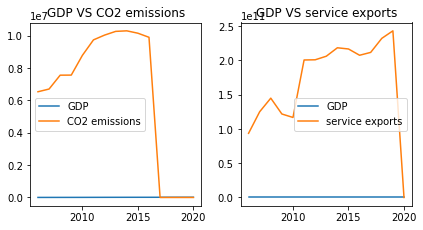

In [43]:
plt.figure(figsize = (6,6))
plt.subplot(2,2,1)
plt.title('GDP VS CO2 emissions')
plt.plot(year, df_china.iloc[0,:], label=df_china.index[0])
plt.plot(year, df_china.iloc[1,:], label=df_china.index[1])
plt.legend()
plt.subplot(2,2,2)
plt.title('GDP VS service exports')
plt.plot(year, df_china.iloc[0,:], label=df_china.index[0])
plt.plot(year, df_china.iloc[2,:], label=df_china.index[2])
plt.legend()
plt.tight_layout()

#### We can see that because the GDP is too small. We need to scale the number of GDP.

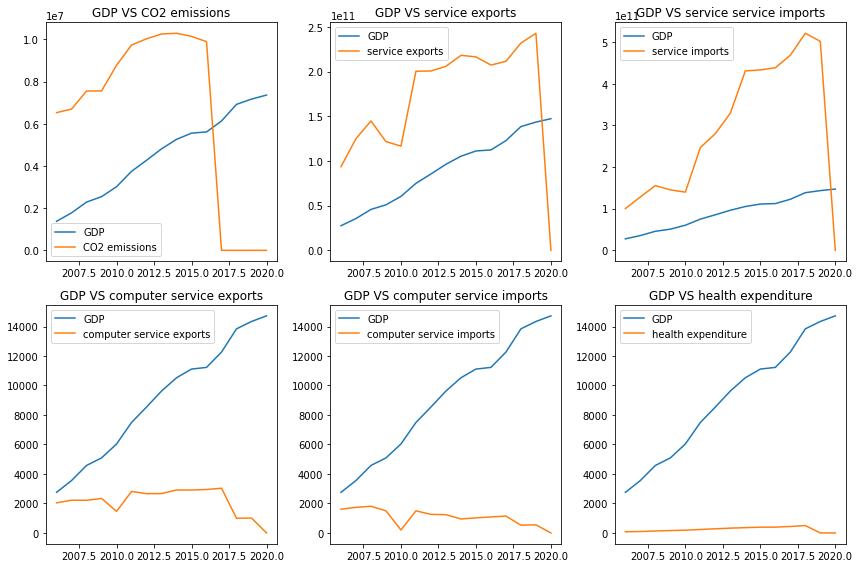

In [44]:
plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.title('GDP VS CO2 emissions')
plt.plot(year, df_china.iloc[0,:]*500, label=df_china.index[0])
plt.plot(year, df_china.iloc[1,:], label=df_china.index[1])
plt.legend()
plt.subplot(2,3,2)
plt.title('GDP VS service exports')
plt.plot(year, df_china.iloc[0,:]*10000000, label=df_china.index[0])
plt.plot(year, df_china.iloc[2,:], label=df_china.index[2])
plt.legend()
plt.subplot(2,3,3)
plt.title('GDP VS service service imports')
plt.plot(year, df_china.iloc[0,:]*10000000, label=df_china.index[0])
plt.plot(year, df_china.iloc[3,:], label=df_china.index[3])
plt.legend()
plt.subplot(2,3,4)
plt.title('GDP VS computer service exports')
plt.plot(year, df_china.iloc[0,:], label=df_china.index[0])
plt.plot(year, df_china.iloc[4,:]*50, label=df_china.index[4])
plt.legend()
plt.subplot(2,3,5)
plt.title('GDP VS computer service imports')
plt.plot(year, df_china.iloc[0,:], label=df_china.index[0])
plt.plot(year, df_china.iloc[5,:]*50, label=df_china.index[5])
plt.legend()
plt.subplot(2,3,6)
plt.title('GDP VS health expenditure')
plt.plot(year, df_china.iloc[0,:], label=df_china.index[0])
plt.plot(year, df_china.iloc[6,:], label=df_china.index[6])
plt.legend()
plt.tight_layout()

#### From the result, in China, we know that CO2 emissions have a positive correlation with GPD. It means that the CO2 emissions will increase as then the GDP increase. service exports and service imports also have a positive correlation with GDP. But computer service exports and computer service imports have a Negative correlation with GDP. Of course, when GDP increase, there is more money can use to support health expenditure and so that there is also a positive correlation.

### 6.2 Use USA data to see the relationship between the data.

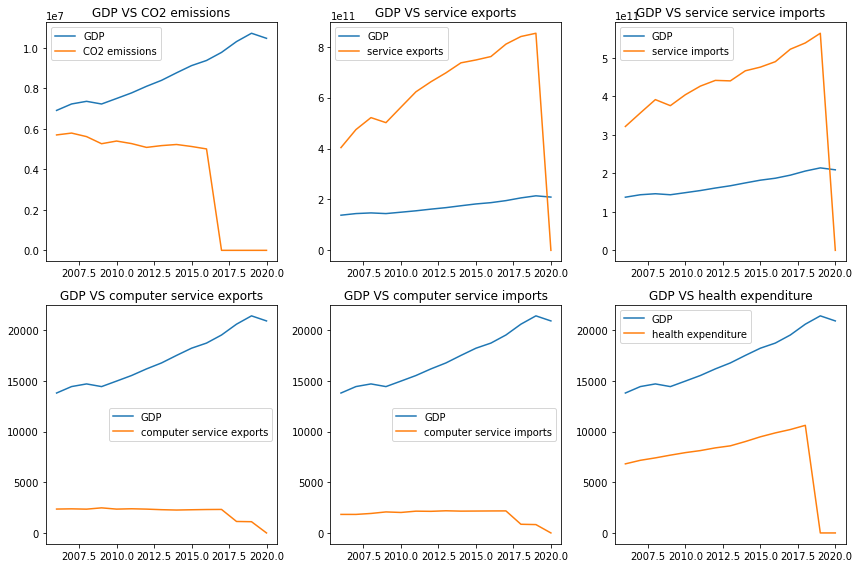

In [45]:
plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.title('GDP VS CO2 emissions')
plt.plot(year, df_USA.iloc[0,:]*500, label=df_USA.index[0])
plt.plot(year, df_USA.iloc[1,:], label=df_USA.index[1])
plt.legend()
plt.subplot(2,3,2)
plt.title('GDP VS service exports')
plt.plot(year, df_USA.iloc[0,:]*10000000, label=df_USA.index[0])
plt.plot(year, df_USA.iloc[2,:], label=df_USA.index[2])
plt.legend()
plt.subplot(2,3,3)
plt.title('GDP VS service service imports')
plt.plot(year, df_USA.iloc[0,:]*10000000, label=df_USA.index[0])
plt.plot(year, df_USA.iloc[3,:], label=df_USA.index[3])
plt.legend()
plt.subplot(2,3,4)
plt.title('GDP VS computer service exports')
plt.plot(year, df_USA.iloc[0,:], label=df_USA.index[0])
plt.plot(year, df_USA.iloc[4,:]*50, label=df_USA.index[4])
plt.legend()
plt.subplot(2,3,5)
plt.title('GDP VS computer service imports')
plt.plot(year, df_USA.iloc[0,:], label=df_USA.index[0])
plt.plot(year, df_USA.iloc[5,:]*50, label=df_USA.index[5])
plt.legend()
plt.subplot(2,3,6)
plt.title('GDP VS health expenditure')
plt.plot(year, df_USA.iloc[0,:], label=df_USA.index[0])
plt.plot(year, df_USA.iloc[6,:], label=df_USA.index[6])
plt.legend()
plt.tight_layout()

#### In the USA, it also has the same result as China. GDP has a positive correlation with CO2 emissions, service exports, service imports, health expenditure and has a negative correlation with computer service exports and computer service imports.

### 6.3 Use TUV data to see the relationship between the data.

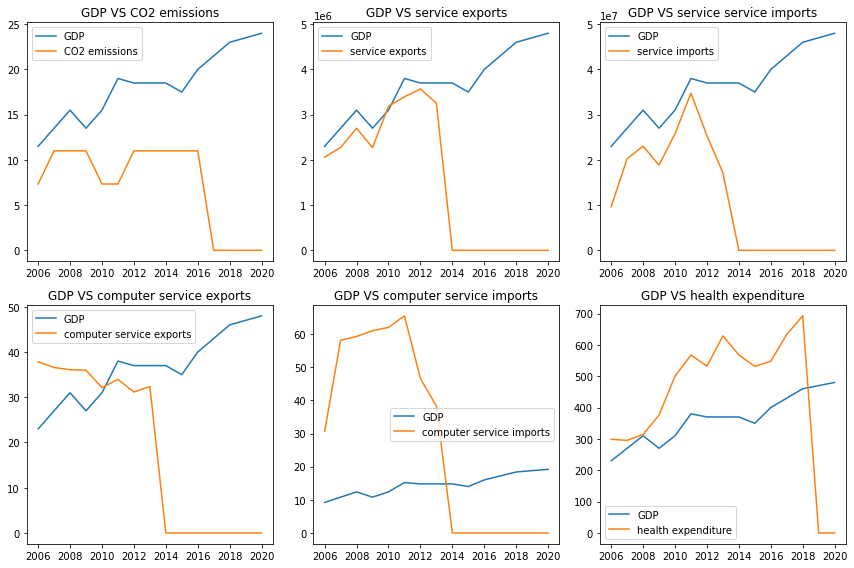

In [46]:
plt.figure(figsize = (12,8))
plt.subplot(2,3,1)
plt.title('GDP VS CO2 emissions')
plt.plot(year, df_TUV.iloc[0,:]*500, label=df_TUV.index[0])
plt.plot(year, df_TUV.iloc[1,:], label=df_TUV.index[1])
plt.legend()
plt.subplot(2,3,2)
plt.title('GDP VS service exports')
plt.plot(year, df_TUV.iloc[0,:]*100000000, label=df_TUV.index[0])
plt.plot(year, df_TUV.iloc[2,:], label=df_TUV.index[2])
plt.legend()
plt.subplot(2,3,3)
plt.title('GDP VS service service imports')
plt.plot(year, df_TUV.iloc[0,:]*1000000000, label=df_TUV.index[0])
plt.plot(year, df_TUV.iloc[3,:], label=df_TUV.index[3])
plt.legend()
plt.subplot(2,3,4)
plt.title('GDP VS computer service exports')
plt.plot(year, df_TUV.iloc[0,:]*1000, label=df_TUV.index[0])
plt.plot(year, df_TUV.iloc[4,:], label=df_TUV.index[4])
plt.legend()
plt.subplot(2,3,5)
plt.title('GDP VS computer service imports')
plt.plot(year, df_TUV.iloc[0,:]*400, label=df_TUV.index[0])
plt.plot(year, df_TUV.iloc[5,:], label=df_TUV.index[5])
plt.legend()
plt.subplot(2,3,6)
plt.title('GDP VS health expenditure')
plt.plot(year, df_TUV.iloc[0,:]*10000, label=df_TUV.index[0])
plt.plot(year, df_TUV.iloc[6,:], label=df_TUV.index[6])
plt.legend()
plt.tight_layout()

#### In TUV, there is a little difference. Most of the data have the same relationship with China and the USA but it has a positive correlation with computer service imports. USA and China have quick development but TUV doesn't have and only has a low GDP. I see the difference between these data is only the computer service imports. Maybe it's important to observe why the TUV doesn't have a quick development.

# 7.Conclusions: In this project, I answer the question that: Do these six indicators have a relationship with GDP? The answer is that besides the computer service, all of the other indicators have a positive correlation relationship. When the GDP increase, these indicators also increase. Especially for CO2 emissions, it changes my mind after this project. I think when the GDP increase, our technology will make a process and we are more powerful to deal with the CO2 and the CO2 emissions will have a negative correlation relationship with GDP previously. But the fact is that the increment of GDP also will make our CO2 emissions increase. I wish this can be the point to consider that how can we develop the GDP and reduce the CO2 emissions, which is better for our world.

#### The following is I use TensorFlow to predict the future GDP in 5 years. Although the loss in the model is very large, it still has the same trends to see the GDP in the future.

In [22]:
#Use tensorflow to predict the future GDP
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'
import tensorflow as tf
import keras
import numpy as np

Using TensorFlow backend.


In [23]:
print(year)

[2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [24]:
def predictThegdp(data):
    '''
    In thie method, you need to give it the GDP data from 2006 to 2020 and it will return you the predict from 2021 to 2025
    '''
    model = keras.Sequential([keras.layers.Dense(units = 1,input_shape = [1])])
    model.compile(optimizer = 'sgd',loss = 'mean_squared_error')
 
    xs = np.array([i for i in range(15)],dtype = float)# Because the number is too large and I have to Feature scaling
    ys = np.array(data,dtype = float)                  #otheriwse, it will be NaN
    print(xs)
    print(ys)
    print(type(xs))
    print(type(ys))
    model.fit(xs,ys,epochs = 500)
    y_data = []
    y2021 = model.predict([15])
    y2022 = model.predict([16])
    y2023 = model.predict([17])
    y2024 = model.predict([18])
    y2025 = model.predict([19])
    y_data.append(y2021)
    y_data.append(y2022)
    y_data.append(y2023)
    y_data.append(y2024)
    y_data.append(y2025)
    return y_data

In [25]:
China = list(df3_gdp.iloc[0,:])
USA = list(df3_gdp.iloc[1,:])
Tuvalu = list(df3_gdp.iloc[2,:])
Total = list(df3_gdp.iloc[3,:])
China1 = predictThegdp(China)
USA1 = predictThegdp(USA)
Tuvalu1 = predictThegdp(Tuvalu)
Total1 = predictThegdp(Total)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14.]
[ 2754.113  3555.679  4577.397  5088.993  6033.813  7492.257  8539.472
  9625.044 10524.211 11113.528 11227.075 12265.317 13841.901 14340.6
 14722.837]
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
Epoch 1/500
15/15 [==============================] - 0s 14ms/step - loss: 96828344.0000
Epoch 2/500
15/15 [==============================] - 0s 66us/step - loss: 14960687.0000
Epoch 3/500
15/15 [==============================] - 0s 53us/step - loss: 3862460.7500
Epoch 4/500
15/15 [==============================] - 0s 130us/step - loss: 2341793.0000
Epoch 5/500
15/15 [==============================] - 0s 65us/step - loss: 2117475.7500
Epoch 6/500
15/15 [==============================] - 0s 65us/step - loss: 2068798.1250
Epoch 7/500
15/15 [==============================] - 0s 66us/step - loss: 2044088.7500
Epoch 8/500
15/15 [==============================] - 0s 74us/step - loss: 2022821.2500
Epoch 9/500
15/15 [====================

Epoch 91/500
15/15 [==============================] - 0s 65us/step - loss: 896666.4375
Epoch 92/500
15/15 [==============================] - 0s 129us/step - loss: 888387.5625
Epoch 93/500
15/15 [==============================] - 0s 84us/step - loss: 880198.7500
Epoch 94/500
15/15 [==============================] - 0s 42us/step - loss: 872099.0625
Epoch 95/500
15/15 [==============================] - 0s 132us/step - loss: 864087.7500
Epoch 96/500
15/15 [==============================] - 0s 107us/step - loss: 856163.2500
Epoch 97/500
15/15 [==============================] - 0s 65us/step - loss: 848325.3750
Epoch 98/500
15/15 [==============================] - 0s 54us/step - loss: 840572.9375
Epoch 99/500
15/15 [==============================] - 0s 65us/step - loss: 832904.4375
Epoch 100/500
15/15 [==============================] - 0s 169us/step - loss: 825319.8125
Epoch 101/500
15/15 [==============================] - 0s 130us/step - loss: 817817.6250
Epoch 102/500
15/15 [===============

Epoch 184/500
15/15 [==============================] - 0s 65us/step - loss: 410979.5000
Epoch 185/500
15/15 [==============================] - 0s 62us/step - loss: 407988.4688
Epoch 186/500
15/15 [==============================] - 0s 169us/step - loss: 405029.9375
Epoch 187/500
15/15 [==============================] - 0s 65us/step - loss: 402103.8125
Epoch 188/500
15/15 [==============================] - 0s 66us/step - loss: 399209.3125
Epoch 189/500
15/15 [==============================] - 0s 65us/step - loss: 396346.1562
Epoch 190/500
15/15 [==============================] - 0s 65us/step - loss: 393514.3750
Epoch 191/500
15/15 [==============================] - 0s 131us/step - loss: 390713.6562
Epoch 192/500
15/15 [==============================] - 0s 130us/step - loss: 387943.1250
Epoch 193/500
15/15 [==============================] - 0s 65us/step - loss: 385202.9375
Epoch 194/500
15/15 [==============================] - 0s 67us/step - loss: 382492.2188
Epoch 195/500
15/15 [========

Epoch 277/500
15/15 [==============================] - 0s 66us/step - loss: 235506.3281
Epoch 278/500
15/15 [==============================] - 0s 65us/step - loss: 234425.7031
Epoch 279/500
15/15 [==============================] - 0s 130us/step - loss: 233356.9062
Epoch 280/500
15/15 [==============================] - 0s 71us/step - loss: 232299.4844
Epoch 281/500
15/15 [==============================] - 0s 62us/step - loss: 231253.9531
Epoch 282/500
15/15 [==============================] - 0s 117us/step - loss: 230219.5312
Epoch 283/500
15/15 [==============================] - 0s 130us/step - loss: 229196.5000
Epoch 284/500
15/15 [==============================] - 0s 65us/step - loss: 228184.5000
Epoch 285/500
15/15 [==============================] - 0s 131us/step - loss: 227183.4844
Epoch 286/500
15/15 [==============================] - 0s 66us/step - loss: 226193.3906
Epoch 287/500
15/15 [==============================] - 0s 129us/step - loss: 225214.2344
Epoch 288/500
15/15 [======

Epoch 370/500
15/15 [==============================] - 0s 76us/step - loss: 172109.9219
Epoch 371/500
15/15 [==============================] - 0s 67us/step - loss: 171719.4219
Epoch 372/500
15/15 [==============================] - 0s 65us/step - loss: 171333.2344
Epoch 373/500
15/15 [==============================] - 0s 131us/step - loss: 170951.2969
Epoch 374/500
15/15 [==============================] - 0s 58us/step - loss: 170573.5312
Epoch 375/500
15/15 [==============================] - 0s 130us/step - loss: 170199.7656
Epoch 376/500
15/15 [==============================] - 0s 65us/step - loss: 169830.2031
Epoch 377/500
15/15 [==============================] - 0s 65us/step - loss: 169464.5469
Epoch 378/500
15/15 [==============================] - 0s 74us/step - loss: 169102.8281
Epoch 379/500
15/15 [==============================] - 0s 75us/step - loss: 168745.4062
Epoch 380/500
15/15 [==============================] - 0s 250us/step - loss: 168391.3281
Epoch 381/500
15/15 [========

Epoch 463/500
15/15 [==============================] - 0s 87us/step - loss: 149205.5469
Epoch 464/500
15/15 [==============================] - 0s 65us/step - loss: 149064.5000
Epoch 465/500
15/15 [==============================] - 0s 65us/step - loss: 148925.0625
Epoch 466/500
15/15 [==============================] - 0s 80us/step - loss: 148787.0156
Epoch 467/500
15/15 [==============================] - 0s 97us/step - loss: 148650.5312
Epoch 468/500
15/15 [==============================] - 0s 253us/step - loss: 148515.5312
Epoch 469/500
15/15 [==============================] - 0s 111us/step - loss: 148382.0000
Epoch 470/500
15/15 [==============================] - 0s 65us/step - loss: 148249.9375
Epoch 471/500
15/15 [==============================] - 0s 96us/step - loss: 148119.2656
Epoch 472/500
15/15 [==============================] - 0s 130us/step - loss: 147989.8438
Epoch 473/500
15/15 [==============================] - 0s 65us/step - loss: 147862.2031
Epoch 474/500
15/15 [========

Epoch 53/500
15/15 [==============================] - 0s 125us/step - loss: 26638034.0000
Epoch 54/500
15/15 [==============================] - 0s 65us/step - loss: 26350328.0000
Epoch 55/500
15/15 [==============================] - 0s 64us/step - loss: 26065760.0000
Epoch 56/500
15/15 [==============================] - 0s 135us/step - loss: 25784284.0000
Epoch 57/500
15/15 [==============================] - 0s 66us/step - loss: 25505878.0000
Epoch 58/500
15/15 [==============================] - 0s 65us/step - loss: 25230498.0000
Epoch 59/500
15/15 [==============================] - 0s 35us/step - loss: 24958118.0000
Epoch 60/500
15/15 [==============================] - 0s 65us/step - loss: 24688706.0000
Epoch 61/500
15/15 [==============================] - 0s 130us/step - loss: 24422222.0000
Epoch 62/500
15/15 [==============================] - 0s 77us/step - loss: 24158648.0000
Epoch 63/500
15/15 [==============================] - 0s 62us/step - loss: 23897938.0000
Epoch 64/500
15/15

Epoch 145/500
15/15 [==============================] - 0s 28us/step - loss: 9864913.0000
Epoch 146/500
15/15 [==============================] - 0s 64us/step - loss: 9759824.0000
Epoch 147/500
15/15 [==============================] - 0s 65us/step - loss: 9655881.0000
Epoch 148/500
15/15 [==============================] - 0s 103us/step - loss: 9553067.0000
Epoch 149/500
15/15 [==============================] - 0s 113us/step - loss: 9451374.0000
Epoch 150/500
15/15 [==============================] - 0s 72us/step - loss: 9350788.0000
Epoch 151/500
15/15 [==============================] - 0s 59us/step - loss: 9251298.0000
Epoch 152/500
15/15 [==============================] - 0s 130us/step - loss: 9152891.0000
Epoch 153/500
15/15 [==============================] - 0s 135us/step - loss: 9055556.0000
Epoch 154/500
15/15 [==============================] - 0s 130us/step - loss: 8959277.0000
Epoch 155/500
15/15 [==============================] - 0s 65us/step - loss: 8864050.0000
Epoch 156/500
15

Epoch 237/500
15/15 [==============================] - 0s 130us/step - loss: 3738281.0000
Epoch 238/500
15/15 [==============================] - 0s 195us/step - loss: 3699896.0000
Epoch 239/500
15/15 [==============================] - 0s 130us/step - loss: 3661929.2500
Epoch 240/500
15/15 [==============================] - 0s 130us/step - loss: 3624375.0000
Epoch 241/500
15/15 [==============================] - 0s 125us/step - loss: 3587229.2500
Epoch 242/500
15/15 [==============================] - 0s 142us/step - loss: 3550488.5000
Epoch 243/500
15/15 [==============================] - 0s 195us/step - loss: 3514147.5000
Epoch 244/500
15/15 [==============================] - 0s 125us/step - loss: 3478202.5000
Epoch 245/500
15/15 [==============================] - 0s 67us/step - loss: 3442648.7500
Epoch 246/500
15/15 [==============================] - 0s 128us/step - loss: 3407482.7500
Epoch 247/500
15/15 [==============================] - 0s 66us/step - loss: 3372699.0000
Epoch 248/50

Epoch 329/500
15/15 [==============================] - 0s 65us/step - loss: 1500430.7500
Epoch 330/500
15/15 [==============================] - 0s 73us/step - loss: 1486409.2500
Epoch 331/500
15/15 [==============================] - 0s 79us/step - loss: 1472541.2500
Epoch 332/500
15/15 [==============================] - 0s 193us/step - loss: 1458824.1250
Epoch 333/500
15/15 [==============================] - 0s 68us/step - loss: 1445256.7500
Epoch 334/500
15/15 [==============================] - 0s 130us/step - loss: 1431836.8750
Epoch 335/500
15/15 [==============================] - 0s 112us/step - loss: 1418562.5000
Epoch 336/500
15/15 [==============================] - 0s 70us/step - loss: 1405432.7500
Epoch 337/500
15/15 [==============================] - 0s 99us/step - loss: 1392446.2500
Epoch 338/500
15/15 [==============================] - 0s 111us/step - loss: 1379601.5000
Epoch 339/500
15/15 [==============================] - 0s 175us/step - loss: 1366896.2500
Epoch 340/500
15

Epoch 422/500
15/15 [==============================] - 0s 64us/step - loss: 677902.3750
Epoch 423/500
15/15 [==============================] - 0s 64us/step - loss: 672836.9375
Epoch 424/500
15/15 [==============================] - 0s 95us/step - loss: 667826.7500
Epoch 425/500
15/15 [==============================] - 0s 130us/step - loss: 662871.0000
Epoch 426/500
15/15 [==============================] - 0s 65us/step - loss: 657968.7500
Epoch 427/500
15/15 [==============================] - 0s 132us/step - loss: 653120.1875
Epoch 428/500
15/15 [==============================] - 0s 65us/step - loss: 648324.6875
Epoch 429/500
15/15 [==============================] - 0s 131us/step - loss: 643581.2500
Epoch 430/500
15/15 [==============================] - 0s 132us/step - loss: 638889.8750
Epoch 431/500
15/15 [==============================] - 0s 123us/step - loss: 634248.8750
Epoch 432/500
15/15 [==============================] - 0s 66us/step - loss: 629658.8125
Epoch 433/500
15/15 [======

Epoch 14/500
15/15 [==============================] - 0s 62us/step - loss: 0.0030
Epoch 15/500
15/15 [==============================] - 0s 107us/step - loss: 0.0030
Epoch 16/500
15/15 [==============================] - 0s 66us/step - loss: 0.0029
Epoch 17/500
15/15 [==============================] - 0s 128us/step - loss: 0.0029
Epoch 18/500
15/15 [==============================] - 0s 67us/step - loss: 0.0029
Epoch 19/500
15/15 [==============================] - 0s 140us/step - loss: 0.0028
Epoch 20/500
15/15 [==============================] - 0s 197us/step - loss: 0.0028
Epoch 21/500
15/15 [==============================] - 0s 66us/step - loss: 0.0028
Epoch 22/500
15/15 [==============================] - 0s 130us/step - loss: 0.0027
Epoch 23/500
15/15 [==============================] - 0s 131us/step - loss: 0.0027
Epoch 24/500
15/15 [==============================] - 0s 129us/step - loss: 0.0027
Epoch 25/500
15/15 [==============================] - 0s 130us/step - loss: 0.0027
Epoch 26

Epoch 114/500
15/15 [==============================] - 0s 67us/step - loss: 0.0010
Epoch 115/500
15/15 [==============================] - 0s 130us/step - loss: 9.9404e-04
Epoch 116/500
15/15 [==============================] - 0s 65us/step - loss: 9.8327e-04
Epoch 117/500
15/15 [==============================] - 0s 65us/step - loss: 9.7262e-04
Epoch 118/500
15/15 [==============================] - 0s 70us/step - loss: 9.6209e-04
Epoch 119/500
15/15 [==============================] - 0s 65us/step - loss: 9.5167e-04
Epoch 120/500
15/15 [==============================] - 0s 65us/step - loss: 9.4136e-04
Epoch 121/500
15/15 [==============================] - 0s 119us/step - loss: 9.3117e-04
Epoch 122/500
15/15 [==============================] - 0s 81us/step - loss: 9.2109e-04
Epoch 123/500
15/15 [==============================] - 0s 130us/step - loss: 9.1112e-04
Epoch 124/500
15/15 [==============================] - 0s 56us/step - loss: 9.0125e-04
Epoch 125/500
15/15 [=======================

Epoch 208/500
15/15 [==============================] - 0s 99us/step - loss: 3.6239e-04
Epoch 209/500
15/15 [==============================] - 0s 65us/step - loss: 3.5850e-04
Epoch 210/500
15/15 [==============================] - 0s 66us/step - loss: 3.5465e-04
Epoch 211/500
15/15 [==============================] - 0s 65us/step - loss: 3.5084e-04
Epoch 212/500
15/15 [==============================] - 0s 79us/step - loss: 3.4708e-04
Epoch 213/500
15/15 [==============================] - 0s 130us/step - loss: 3.4335e-04
Epoch 214/500
15/15 [==============================] - 0s 67us/step - loss: 3.3967e-04
Epoch 215/500
15/15 [==============================] - 0s 130us/step - loss: 3.3603e-04
Epoch 216/500
15/15 [==============================] - 0s 65us/step - loss: 3.3243e-04
Epoch 217/500
15/15 [==============================] - 0s 66us/step - loss: 3.2886e-04
Epoch 218/500
15/15 [==============================] - 0s 133us/step - loss: 3.2534e-04
Epoch 219/500
15/15 [===================

Epoch 302/500
15/15 [==============================] - 0s 58us/step - loss: 1.3277e-04
Epoch 303/500
15/15 [==============================] - 0s 66us/step - loss: 1.3138e-04
Epoch 304/500
15/15 [==============================] - 0s 86us/step - loss: 1.3001e-04
Epoch 305/500
15/15 [==============================] - 0s 60us/step - loss: 1.2865e-04
Epoch 306/500
15/15 [==============================] - 0s 65us/step - loss: 1.2730e-04
Epoch 307/500
15/15 [==============================] - 0s 130us/step - loss: 1.2597e-04
Epoch 308/500
15/15 [==============================] - 0s 65us/step - loss: 1.2465e-04
Epoch 309/500
15/15 [==============================] - 0s 62us/step - loss: 1.2335e-04
Epoch 310/500
15/15 [==============================] - 0s 84us/step - loss: 1.2207e-04
Epoch 311/500
15/15 [==============================] - 0s 130us/step - loss: 1.2079e-04
Epoch 312/500
15/15 [==============================] - 0s 75us/step - loss: 1.1953e-04
Epoch 313/500
15/15 [====================

Epoch 396/500
15/15 [==============================] - 0s 117us/step - loss: 5.0718e-05
Epoch 397/500
15/15 [==============================] - 0s 87us/step - loss: 5.0221e-05
Epoch 398/500
15/15 [==============================] - 0s 65us/step - loss: 4.9730e-05
Epoch 399/500
15/15 [==============================] - 0s 105us/step - loss: 4.9244e-05
Epoch 400/500
15/15 [==============================] - 0s 67us/step - loss: 4.8763e-05
Epoch 401/500
15/15 [==============================] - 0s 99us/step - loss: 4.8288e-05
Epoch 402/500
15/15 [==============================] - 0s 228us/step - loss: 4.7817e-05
Epoch 403/500
15/15 [==============================] - 0s 134us/step - loss: 4.7352e-05
Epoch 404/500
15/15 [==============================] - 0s 138us/step - loss: 4.6892e-05
Epoch 405/500
15/15 [==============================] - 0s 130us/step - loss: 4.6437e-05
Epoch 406/500
15/15 [==============================] - 0s 130us/step - loss: 4.5987e-05
Epoch 407/500
15/15 [===============

Epoch 490/500
15/15 [==============================] - 0s 131us/step - loss: 2.1396e-05
Epoch 491/500
15/15 [==============================] - 0s 63us/step - loss: 2.1218e-05
Epoch 492/500
15/15 [==============================] - 0s 130us/step - loss: 2.1043e-05
Epoch 493/500
15/15 [==============================] - 0s 67us/step - loss: 2.0869e-05
Epoch 494/500
15/15 [==============================] - 0s 133us/step - loss: 2.0697e-05
Epoch 495/500
15/15 [==============================] - 0s 66us/step - loss: 2.0527e-05
Epoch 496/500
15/15 [==============================] - 0s 64us/step - loss: 2.0359e-05
Epoch 497/500
15/15 [==============================] - 0s 130us/step - loss: 2.0193e-05
Epoch 498/500
15/15 [==============================] - 0s 85us/step - loss: 2.0029e-05
Epoch 499/500
15/15 [==============================] - 0s 46us/step - loss: 1.9866e-05
Epoch 500/500
15/15 [==============================] - 0s 131us/step - loss: 1.9705e-05
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  

Epoch 79/500
15/15 [==============================] - 0s 130us/step - loss: 383497632.0000
Epoch 80/500
15/15 [==============================] - 0s 65us/step - loss: 379442816.0000
Epoch 81/500
15/15 [==============================] - 0s 65us/step - loss: 375432096.0000
Epoch 82/500
15/15 [==============================] - 0s 143us/step - loss: 371465056.0000
Epoch 83/500
15/15 [==============================] - 0s 129us/step - loss: 367541184.0000
Epoch 84/500
15/15 [==============================] - 0s 167us/step - loss: 363659968.0000
Epoch 85/500
15/15 [==============================] - 0s 83us/step - loss: 359821152.0000
Epoch 86/500
15/15 [==============================] - 0s 131us/step - loss: 356024032.0000
Epoch 87/500
15/15 [==============================] - 0s 64us/step - loss: 352268288.0000
Epoch 88/500
15/15 [==============================] - 0s 14us/step - loss: 348553504.0000
Epoch 89/500
15/15 [==============================] - 0s 84us/step - loss: 344879040.0000
Epoch

Epoch 169/500
15/15 [==============================] - 0s 69us/step - loss: 150110128.0000
Epoch 170/500
15/15 [==============================] - 0s 197us/step - loss: 148596208.0000
Epoch 171/500
15/15 [==============================] - 0s 65us/step - loss: 147098816.0000
Epoch 172/500
15/15 [==============================] - 0s 127us/step - loss: 145617712.0000
Epoch 173/500
15/15 [==============================] - 0s 138us/step - loss: 144152720.0000
Epoch 174/500
15/15 [==============================] - 0s 124us/step - loss: 142703712.0000
Epoch 175/500
15/15 [==============================] - 0s 130us/step - loss: 141270448.0000
Epoch 176/500
15/15 [==============================] - 0s 129us/step - loss: 139852784.0000
Epoch 177/500
15/15 [==============================] - 0s 65us/step - loss: 138450608.0000
Epoch 178/500
15/15 [==============================] - 0s 130us/step - loss: 137063664.0000
Epoch 179/500
15/15 [==============================] - 0s 137us/step - loss: 135691

Epoch 259/500
15/15 [==============================] - 0s 47us/step - loss: 62974976.0000
Epoch 260/500
15/15 [==============================] - 0s 65us/step - loss: 62409784.0000
Epoch 261/500
15/15 [==============================] - 0s 189us/step - loss: 61850712.0000
Epoch 262/500
15/15 [==============================] - 0s 73us/step - loss: 61297724.0000
Epoch 263/500
15/15 [==============================] - 0s 45us/step - loss: 60750776.0000
Epoch 264/500
15/15 [==============================] - 0s 76us/step - loss: 60209800.0000
Epoch 265/500
15/15 [==============================] - 0s 112us/step - loss: 59674676.0000
Epoch 266/500
15/15 [==============================] - 0s 93us/step - loss: 59145404.0000
Epoch 267/500
15/15 [==============================] - 0s 198us/step - loss: 58621876.0000
Epoch 268/500
15/15 [==============================] - 0s 65us/step - loss: 58104080.0000
Epoch 269/500
15/15 [==============================] - 0s 83us/step - loss: 57591892.0000
Epoch 2

Epoch 350/500
15/15 [==============================] - 0s 260us/step - loss: 30231832.0000
Epoch 351/500
15/15 [==============================] - 0s 79us/step - loss: 30023106.0000
Epoch 352/500
15/15 [==============================] - 0s 65us/step - loss: 29816662.0000
Epoch 353/500
15/15 [==============================] - 0s 66us/step - loss: 29612460.0000
Epoch 354/500
15/15 [==============================] - 0s 172us/step - loss: 29410484.0000
Epoch 355/500
15/15 [==============================] - 0s 136us/step - loss: 29210698.0000
Epoch 356/500
15/15 [==============================] - 0s 61us/step - loss: 29013084.0000
Epoch 357/500
15/15 [==============================] - 0s 71us/step - loss: 28817620.0000
Epoch 358/500
15/15 [==============================] - 0s 65us/step - loss: 28624300.0000
Epoch 359/500
15/15 [==============================] - 0s 77us/step - loss: 28433082.0000
Epoch 360/500
15/15 [==============================] - 0s 69us/step - loss: 28243930.0000
Epoch 3

Epoch 441/500
15/15 [==============================] - 0s 65us/step - loss: 18140236.0000
Epoch 442/500
15/15 [==============================] - 0s 65us/step - loss: 18063148.0000
Epoch 443/500
15/15 [==============================] - 0s 130us/step - loss: 17986914.0000
Epoch 444/500
15/15 [==============================] - 0s 69us/step - loss: 17911498.0000
Epoch 445/500
15/15 [==============================] - 0s 122us/step - loss: 17836910.0000
Epoch 446/500
15/15 [==============================] - 0s 65us/step - loss: 17763128.0000
Epoch 447/500
15/15 [==============================] - 0s 65us/step - loss: 17690152.0000
Epoch 448/500
15/15 [==============================] - 0s 64us/step - loss: 17617972.0000
Epoch 449/500
15/15 [==============================] - 0s 130us/step - loss: 17546586.0000
Epoch 450/500
15/15 [==============================] - 0s 195us/step - loss: 17475974.0000
Epoch 451/500
15/15 [==============================] - 0s 65us/step - loss: 17406122.0000
Epoch 

In [26]:
china_a = China
USA_a = USA
Tuvalu_a = Tuvalu
Total_a = Total
for i in China1:
    china_a.append(i[0][0])
for i in USA1:
    USA_a.append(i[0][0])
for i in Tuvalu1:
    Tuvalu_a.append(i[0][0])
for i in Total1:
    Total_a.append(i[0][0])

In [27]:
year1 = year
year1.extend([2021, 2022, 2023, 2024, 2025])

In [28]:
future_data = pd.DataFrame({'China':china_a, 'USA':USA_a, 'Tuvalu':Tuvalu_a, 'Total':Total_a}, index = year1)
future_data = future_data.stack()
future_data = future_data.unstack(0)
future_data

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025
China,2754.113,3555.679,4577.397,5088.993,6033.813,7492.257,8539.472,9625.044,10524.211,11113.528,11227.075,12265.317,13841.901,14340.600,14722.837,16240.045898,17145.205078,18050.363281,18955.521484,19860.679688
USA,13814.600,14451.875,14712.825,14448.925,14992.050,15542.600,16197.050,16784.825,17527.275,18238.300,18745.100,19542.975,20611.875,21433.225,20932.750,22227.746094,22885.164062,23542.582031,24200.000000,24857.417969
Tuvalu,0.023,0.027,0.031,0.027,0.031,0.038,0.037,0.037,0.037,0.035,0.040,0.043,0.046,0.047,0.048,0.045427,0.046301,0.047174,0.048047,0.048920
Total,51617.631,58255.141,63878.933,60521.429,66180.940,73503.345,74895.977,77065.298,79135.962,74917.721,76151.185,80825.686,85884.016,87336.213,84528.682,93103.500000,95743.406250,98383.312500,101023.203125,103663.109375


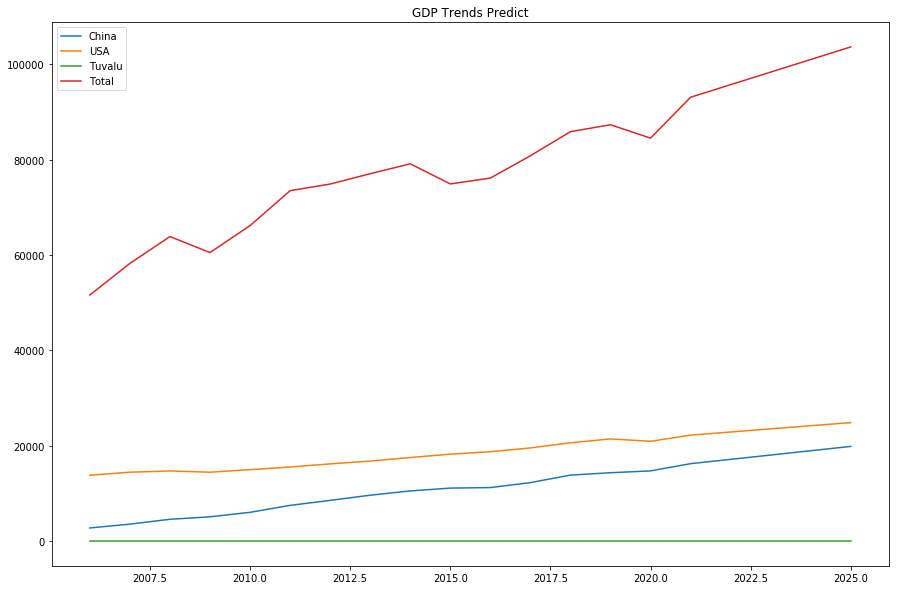

In [30]:
plt.figure(figsize=(15,10))
for i in range(len(future_data)):
    plt.plot(year1, future_data.iloc[i,:], label=future_data.index[i])
plt.legend()
plt.title('GDP Trends Predict')
plt.show()

#### The trends will continue and the Total trends aren't shocking because of the large loss in the model. If we want to get a more accurate prediction we can increase the train steps or using more feature engineering or design the network for it.